Mount Google Drive to load the model for testing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob

Resize the image to multiple of 16, because of the proposed network structure, there is 4 times downscaling. Each down scale will half the size of input.

In [ ]:
def resize(img):
  x, y = img.shape[0], img.shape[1]

  while (x % 16 != 0):
    x = x-1

  while (y % 16 != 0):
    y = y-1

  img = cv2.resize(img, (y, x))

  return img

In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.losses import MAE, MSE

def lossVGG(y_true, y_pred):
	vgg = VGG19(include_top=False, weights='imagenet')
	vgg.trainable = False
	content_layers = 'block2_conv2'

	lossModel = Model(vgg.input, vgg.get_layer(content_layers).output)

	vggX = lossModel(y_pred)
	vggY = lossModel(y_true)
	
	return K.mean(K.square(vggX - vggY)) 

def my_loss(y_true, y_pred):
	mse = MSE(y_true, y_pred)
	return lossVGG(y_true, y_pred) + mse

c = tf.keras.models.load_model('/content/drive/My Drive/ITS/combine-03-0.0584.hdf5', custom_objects={"my_loss": my_loss})
o = tf.keras.models.load_model('/content/drive/My Drive/ITS/outdoorunet-19-0.0584.hdf5', custom_objects={"my_loss": my_loss})
i = tf.keras.models.load_model('/content/drive/My Drive/ITS/indoorunet-05-0.3655.hdf5', custom_objects={"my_loss": my_loss})

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
# test1 = cv2.imread('/content/train.png')
# test1 = cv2.imread('/content/cones.jpg')
test1 = cv2.imread('/content/canyon.jpg')

test2 = cv2.cvtColor(test1, cv2.COLOR_BGR2RGB)

In [ ]:
test1 = resize(test1)

In [ ]:
I = test1/255.

In [ ]:
test_input1 = np.expand_dims(I, axis=0)

In [ ]:
y = c.predict(test_input1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


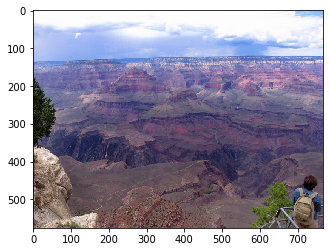

In [ ]:
J = cv2.cvtColor(y[0], cv2.COLOR_BGR2RGB)
plt.imshow(J)

Download the output result

In [ ]:
out = cv2.resize(y[0], (test2.shape[1], test2.shape[0]))
cv2.imwrite('/content/combinec.png', out*255)

True